## CA2 Capstone Project

## Data Exploration 

# Import packages

In [245]:
#Import packages necessary for model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
# Import thi slibrary to suppress the warnings
import warnings
warnings.filterwarnings('ignore')   

## Abstract: 
The following datsets are taken from the Google Health  Covid-19 Open Data repository at: https://health.google.com/covid-19/open-data/raw-data 
-Demographics.csv captures demographic data.
-	Epideimology.csv shows daily information includin  new cases, deaths.-•	Economy.csv captures economic data, mostly at a country lev.e-
•	Oxford-government-response.csv chronicles government’s actioe  to tackle Covid-1n-
•	Index.csv is the index of place names used in the datasets. This includes the keys that    can link the datasets together. Data can be included at many levels country, regional and city level  


In [246]:
# Read Covid-19 files
df_Cindex = pd.read_csv('index.csv')
df_Economy = pd.read_csv('economy.csv')
df_Demog = pd.read_csv('demographics.csv')
df_Oxgovt = pd.read_csv('oxford-government-response.csv')
df_Epid = pd.read_csv('epidemiology.csv')

In [247]:
df_Cindex.shape

(22963, 15)

In [248]:
df_Economy.shape

(404, 4)

In [249]:
df_Demog.shape

(21689, 19)

In [250]:
df_Oxgovt.shape

(303969, 22)

In [251]:
df_Epid.shape

(12525825, 10)

In [252]:
# Display first 5 records
df_Cindex.head()

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
0,AD,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0
1,AE,ChIJvRKrsd9IXj4RpwoIwFYv0zM,Q878,country/ARE,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,AE,ARE,0
2,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,Q889,country/AFG,AF,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,AF,AFG,0
3,AF_BAL,ChIJWZOescNSyzgRkmVJ8fmfR3k,Q121104,NaN,AF,Afghanistan,BAL,Balkh,NaN,NaN,NaN,NaN,AF,AFG,1
4,AF_BAM,ChIJw-bKQwDr0jgRQiw8jHsQ-HI,Q171382,NaN,AF,Afghanistan,BAM,Bamyan,NaN,NaN,NaN,NaN,AF,AFG,1


In [253]:
#Display field and file information
df_Cindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22963 entries, 0 to 22962
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location_key        22962 non-null  object
 1   place_id            21661 non-null  object
 2   wikidata_id         22184 non-null  object
 3   datacommons_id      4216 non-null   object
 4   country_code        22962 non-null  object
 5   country_name        22963 non-null  object
 6   subregion1_code     22715 non-null  object
 7   subregion1_name     22716 non-null  object
 8   subregion2_code     21253 non-null  object
 9   subregion2_name     21253 non-null  object
 10  locality_code       32 non-null     object
 11  locality_name       32 non-null     object
 12  iso_3166_1_alpha_2  22961 non-null  object
 13  iso_3166_1_alpha_3  22962 non-null  object
 14  aggregation_level   22963 non-null  int64 
dtypes: int64(1), object(14)
memory usage: 2.6+ MB


In [254]:
#Statistical Profile of the numeric fields in the file
df_Cindex.describe()

,aggregation_level
count,22963.000000
mean,1.917607
std,0.315946
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,3.000000


In [255]:
# Display first 5 records
df_Economy.head() 

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index
0,AD,3.154058e+09,40886.0,NaN
1,AE,4.211423e+11,43103.0,0.659
2,AF,1.910135e+10,502.0,0.389
3,AG,1.727759e+09,17790.0,NaN
4,AL,1.527808e+10,5352.0,0.621


In [256]:
#Display field and file information
df_Economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location_key         403 non-null    object 
 1   gdp_usd              373 non-null    float64
 2   gdp_per_capita_usd   365 non-null    float64
 3   human_capital_index  156 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.8+ KB


In [257]:
#Statistical Profile of the numeric fields in the file
df_Economy.describe()

,gdp_usd,gdp_per_capita_usd,human_capital_index
count,3.730000e+02,3.650000e+02,156.000000
mean,5.157689e+11,3.325822e+04,0.567212
std,1.776613e+12,1.312347e+05,0.152091
min,3.158000e+04,2.610000e+02,0.293000
25%,1.367280e+10,5.582000e+03,0.431500
50%,5.207625e+10,2.183000e+04,0.567000
75%,2.179620e+11,4.248000e+04,0.695750
max,2.137442e+13,2.490617e+06,0.884000


In [258]:
# Display first 5 records
df_Demog.head()

,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,AF_BAL,1509183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF_BAM,495557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
#Display field and file information
df_Demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21689 entries, 0 to 21688
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   location_key                 21688 non-null  object 
 1   population                   21659 non-null  float64
 2   population_male              17607 non-null  float64
 3   population_female            17607 non-null  float64
 4   population_rural             213 non-null    float64
 5   population_urban             213 non-null    float64
 6   population_largest_city      152 non-null    float64
 7   population_clustered         121 non-null    float64
 8   population_density           1192 non-null   float64
 9   human_development_index      5738 non-null   float64
 10  population_age_00_09         17249 non-null  float64
 11  population_age_10_19         17248 non-null  float64
 12  population_age_20_29         17248 non-null  float64
 13  population_age_3

In [260]:
#Statistical Profile of the numeric fields in the file
df_Demog.describe()

,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
count,2.165900e+04,1.760700e+04,1.760700e+04,2.130000e+02,2.130000e+02,1.520000e+02,1.210000e+02,1192.000000,5738.000000,1.724900e+04,1.724800e+04,1.724800e+04,1.725600e+04,1.725000e+04,1.723200e+04,1.721400e+04,1.712700e+04,1.696000e+04
mean,7.464804e+05,4.140895e+05,4.086139e+05,1.591651e+07,1.997289e+07,4.484559e+06,1.489624e+07,664.767027,0.694872,1.343763e+05,1.295342e+05,1.272395e+05,1.247915e+05,1.068669e+05,9.420718e+04,6.750449e+04,3.681335e+04,1.805530e+04
std,1.482830e+07,8.501449e+06,8.037004e+06,7.372102e+07,7.153961e+07,6.015669e+06,4.408693e+07,2950.242299,0.931163,2.555456e+06,2.584671e+06,2.552722e+06,2.605613e+06,2.264686e+06,2.099073e+06,1.450492e+06,7.058237e+05,2.934413e+05
min,0.000000e+00,8.000000e+00,1.700000e+01,0.000000e+00,5.464000e+03,3.427430e+05,1.026758e+06,0.138000,0.354000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,-1.955000e+03
25%,4.754000e+03,2.413500e+03,2.363500e+03,2.051630e+05,4.759020e+05,1.131670e+06,1.775933e+06,78.900000,0.608000,7.460000e+02,8.517500e+02,6.860000e+02,6.240000e+02,5.630000e+02,4.580000e+02,3.280000e+02,1.980000e+02,1.050000e+02
50%,1.717300e+04,7.460000e+03,7.403000e+03,1.758851e+06,3.850231e+06,2.159137e+06,3.137690e+06,153.356000,0.695000,2.364000e+03,2.609000e+03,2.213500e+03,1.945000e+03,1.710500e+03,1.403500e+03,1.030000e+03,6.270000e+02,3.310000e+02
75%,7.963800e+04,2.766600e+04,2.820550e+04,9.989317e+06,1.109211e+07,4.917428e+06,9.877181e+06,369.625000,0.753000,8.347000e+03,8.962500e+03,8.279750e+03,7.522000e+03,6.688750e+03,5.975000e+03,4.685750e+03,2.805500e+03,1.524000e+03
max,1.439324e+09,7.382473e+08,7.010764e+08,8.953862e+08,8.429340e+08,3.743519e+07,3.989761e+08,84383.000000,70.910000,2.348616e+08,2.522015e+08,2.399021e+08,2.288304e+08,2.161118e+08,2.221859e+08,1.516639e+08,7.149430e+07,2.661810e+07


In [261]:
# Display last 5 records
df_Oxgovt.tail()

,date,location_key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,...,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
303964,2022-07-04,ZW,1.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,42.59
303965,2022-07-05,ZW,1.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,42.59
303966,2022-07-06,ZW,1.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,42.59
303967,2022-07-07,ZW,1.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,42.59
303968,2022-07-08,ZW,1.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,...,NaN,NaN,2.0,3.0,1.0,NaN,0.0,3.0,5.0,42.59


In [262]:
#Display field and file information
df_Oxgovt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303969 entries, 0 to 303968
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   date                                303969 non-null  object 
 1   location_key                        303053 non-null  object 
 2   school_closing                      302415 non-null  float64
 3   workplace_closing                   302243 non-null  float64
 4   cancel_public_events                302068 non-null  float64
 5   restrictions_on_gatherings          301981 non-null  float64
 6   public_transport_closing            301845 non-null  float64
 7   stay_at_home_requirements           302074 non-null  float64
 8   restrictions_on_internal_movement   302034 non-null  float64
 9   international_travel_controls       300241 non-null  float64
 10  income_support                      286963 non-null  float64
 11  debt_relief               

In [263]:
#Statistical Profile of the numeric fields in the file
df_Oxgovt.describe()

,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
count,302415.000000,302243.000000,302068.000000,301981.000000,301845.000000,302074.000000,302034.000000,300241.000000,286963.000000,286854.00000,1.467490e+05,1.466450e+05,302001.000000,300377.000000,298180.000000,1.510990e+05,2.327340e+05,301618.000000,301242.000000,301587.000000
mean,1.471319,1.304182,1.245832,2.210308,0.500678,0.839917,0.899213,2.497783,0.739803,0.86293,1.218849e+08,6.164138e+06,1.866603,2.183563,1.398179,6.057794e+06,8.375711e+05,2.383412,2.531290,49.302817
std,1.075089,0.944901,0.788635,1.634293,0.660792,0.871215,0.834520,1.256683,0.733602,0.79253,1.034520e+10,2.180872e+09,0.454062,0.911950,0.733255,7.750679e+08,2.137846e+08,1.237948,2.277946,22.246811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,2.000000,2.000000,1.000000,0.000000e+00,0.000000e+00,2.000000,0.000000,34.720000
50%,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.00000,0.000000e+00,0.000000e+00,2.000000,2.000000,2.000000,0.000000e+00,0.000000e+00,3.000000,3.000000,50.930000
75%,2.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,3.000000,1.000000,2.00000,0.000000e+00,0.000000e+00,2.000000,3.000000,2.000000,0.000000e+00,0.000000e+00,3.000000,5.000000,65.740000
max,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.00000,1.957600e+12,8.343531e+11,2.000000,3.000000,2.000000,2.424000e+11,1.004046e+11,4.000000,5.000000,100.000000


In [264]:
# Display last 5 records
df_Epid.tail()

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
12525820,2022-09-09,ZW,11.0,0.0,NaN,NaN,256870.0,5596.0,NaN,NaN
12525821,2022-09-10,ZW,18.0,0.0,NaN,NaN,256888.0,5596.0,NaN,NaN
12525822,2022-09-11,ZW,0.0,0.0,NaN,NaN,256888.0,5596.0,NaN,NaN
12525823,2022-09-12,ZW,51.0,0.0,NaN,NaN,256939.0,5596.0,NaN,NaN
12525824,2022-09-13,ZW,0.0,0.0,NaN,NaN,256939.0,5596.0,NaN,NaN


In [265]:
#Display field and file information
df_Epid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525825 entries, 0 to 12525824
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date                  object 
 1   location_key          object 
 2   new_confirmed         float64
 3   new_deceased          float64
 4   new_recovered         float64
 5   new_tested            float64
 6   cumulative_confirmed  float64
 7   cumulative_deceased   float64
 8   cumulative_recovered  float64
 9   cumulative_tested     float64
dtypes: float64(8), object(2)
memory usage: 955.6+ MB


In [266]:
#Statistical Profile of the numeric fields in the file
df_Epid.describe()

,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
count,1.247580e+07,1.166714e+07,3.980462e+06,3.194489e+06,1.232704e+07,1.147482e+07,3.991157e+06,3.012920e+06
mean,1.111905e+02,1.274817e+00,2.104549e+02,2.509508e+03,3.539969e+04,5.874310e+02,6.655680e+04,9.057159e+05
std,1.165983e+04,8.808127e+01,1.898989e+04,2.955847e+05,6.135014e+05,9.228857e+03,1.572899e+06,1.518347e+07
min,-5.045418e+06,-6.381100e+04,-1.001683e+07,-3.541552e+08,0.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.020000e+02,3.000000e+00,0.000000e+00,3.460000e+02
50%,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.034000e+03,1.800000e+01,7.000000e+00,1.890000e+03
75%,1.100000e+01,0.000000e+00,5.000000e+00,5.200000e+01,5.002000e+03,8.100000e+01,3.099000e+03,1.508900e+04
max,5.047094e+06,6.383000e+04,9.967355e+06,3.541856e+08,9.244050e+07,1.005195e+06,2.345841e+08,9.214000e+09


# Does the Data need to be wrangled?
Focus initially on the Index file as it is the key to creating the consolidated file as the keys in the file will be used to link the other files together.
- Missing values - check the index file - numerous cases but expected.
- Duplicate records checked - none 
- Not necesary to convert string / categorical to numeric yet
- need to be normalised / rescaled - not yet - check again when data extracted.

In [267]:
# Check for missing values
missing_values = df_Cindex.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
location_key              1
place_id               1302
wikidata_id             779
datacommons_id        18747
country_code              1
country_name              0
subregion1_code         248
subregion1_name         247
subregion2_code        1710
subregion2_name        1710
locality_code         22931
locality_name         22931
iso_3166_1_alpha_2        2
iso_3166_1_alpha_3        1
aggregation_level         0
dtype: int64


In [268]:
# Check for duplicate records

In [269]:
duplicate_rows = df_Cindex.duplicated()

# print duplicate rows
print(duplicate_rows)

0        False
1        False
2        False
3        False
4        False
         ...  
22958    False
22959    False
22960    False
22961    False
22962    False
Length: 22963, dtype: bool


### Creation of Consolidated dataset
-  The 5 files downloaded are combined at country level
-  2 new fields are calculated

In [270]:
# create a subset of the index file with all locations with an aggregation level 0 - country level

subset = df_Cindex[df_Cindex["aggregation_level"].isin([0])]
print(subset)
df_Country = subset[["location_key","country_name","country_code"]]
df_Country

      location_key                     place_id wikidata_id datacommons_id  \
0               AD  ChIJlfCemC71pRIRkn_qeNc-yQc        Q228    country/AND   
1               AE  ChIJvRKrsd9IXj4RpwoIwFYv0zM        Q878    country/ARE   
2               AF  ChIJbQL_-LZu0TgReNqWvg1GtfM        Q889    country/AFG   
37              AG  ChIJwdG4bbluDYwRlHmL4Yg3aic        Q781    country/ATG   
38              AI  ChIJ5QHvjnRjDowRgdTghNNqnTs      Q25228    country/AIA   
...            ...                          ...         ...            ...   
22897           YE  ChIJX7w0fKzbAxYRrneufjcp8ZI        Q805    country/YEM   
22898           YT                          NaN      Q17063    country/MYT   
22899           ZA  ChIJURLu2YmmNBwRoOikHwxjXeg        Q258    country/ZAF   
22961           ZM  ChIJcQv8_KX0QBkRRT5Yfqz5n_E        Q953    country/ZMB   
22962           ZW  ChIJYXGxBuekMRkR7r_LxV84wKE        Q954    country/ZWE   

      country_code          country_name subregion1_code subreg

,location_key,country_name,country_code
0,AD,Andorra,AD
1,AE,United Arab Emirates,AE
2,AF,Afghanistan,AF
37,AG,Antigua and Barbuda,AG
38,AI,Anguilla,AI
...,...,...,...
22897,YE,Yemen,YE
22898,YT,Mayotte,YT
22899,ZA,South Africa,ZA
22961,ZM,Zambia,ZM


In [271]:
#Merge the country data into the economy dataframe
df_Cecon = pd.merge(df_Economy,df_Country,on="location_key",how="inner")

In [272]:
df_Cecon

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index,country_name,country_code
0,AD,3.154058e+09,40886.0,NaN,Andorra,AD
1,AE,4.211423e+11,43103.0,0.659,United Arab Emirates,AE
2,AF,1.910135e+10,502.0,0.389,Afghanistan,AF
3,AG,1.727759e+09,17790.0,NaN,Antigua and Barbuda,AG
4,AL,1.527808e+10,5352.0,0.621,Albania,AL
...,...,...,...,...,...,...
198,WS,8.506550e+08,4315.0,NaN,Samoa,WS
199,YE,2.759126e+10,968.0,0.369,Yemen,YE
200,ZA,3.514316e+11,6001.0,0.406,South Africa,ZA
201,ZM,2.306472e+10,1291.0,0.396,Zambia,ZM


In [273]:
# Check the incidence of countries with null values in the Human Capital Index
NaNsubset = df_Cecon[df_Cecon["human_capital_index"].isnull()]
print(NaNsubset)
    

    location_key       gdp_usd  gdp_per_capita_usd  human_capital_index  \
0             AD  3.154058e+09             40886.0                  NaN   
3             AG  1.727759e+09             17790.0                  NaN   
8             AS  6.360000e+08             11466.0                  NaN   
11            AW  3.056425e+09             29007.0                  NaN   
14            BB  5.209000e+09             18148.0                  NaN   
22            BN  1.346942e+10             31086.0                  NaN   
23            BO  4.089532e+10              3552.0                  NaN   
25            BS  1.282700e+10             32933.0                  NaN   
26            BT  2.446674e+09              3243.0                  NaN   
28            BY  6.308046e+10              6663.0                  NaN   
29            BZ  1.879614e+09              4815.0                  NaN   
32            CF  2.220307e+09               467.0                  NaN   
41            CU  1.00023

In [274]:
# add country level demographic data to the df_Cecon dataframe
df_DCecon = pd.merge(df_Cecon,df_Demog,on="location_key",how="inner")

In [275]:
df_DCecon

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index,country_name,country_code,population,population_male,population_female,population_rural,...,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,3.154058e+09,40886.0,NaN,Andorra,AD,77265.0,58625.0,55581.0,9269.0,...,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,4.211423e+11,43103.0,0.659,United Arab Emirates,AE,9890400.0,6836349.0,3054051.0,1290785.0,...,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,1.910135e+10,502.0,0.389,Afghanistan,AF,38928341.0,19976265.0,18952076.0,28244481.0,...,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,AG,1.727759e+09,17790.0,NaN,Antigua and Barbuda,AG,97928.0,47269.0,50659.0,73318.0,...,0.780,14583.0,13867.0,14894.0,14094.0,13860.0,12832.0,8043.0,4101.0,1654.0
4,AL,1.527808e+10,5352.0,0.621,Albania,AL,2862427.0,1429594.0,1432833.0,1106598.0,...,0.764,319074.0,381542.0,474360.0,366807.0,339697.0,398271.0,315510.0,190753.0,52224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,WS,8.506550e+08,4315.0,NaN,Samoa,WS,198410.0,102703.0,95707.0,161509.0,...,0.713,51123.0,41998.0,31295.0,22012.0,19560.0,16470.0,9960.0,4580.0,1412.0
199,YE,2.759126e+10,968.0,0.369,Yemen,YE,29825968.0,15024985.0,14800983.0,18292399.0,...,0.452,8033408.0,6750274.0,5732746.0,4140438.0,2362804.0,1422835.0,879450.0,403471.0,100542.0
200,ZA,3.514316e+11,6001.0,0.406,South Africa,ZA,59308690.0,29216012.0,30092678.0,19408553.0,...,0.699,11585605.0,10409174.0,10141489.0,10155325.0,7043275.0,4911532.0,3164441.0,1476055.0,421794.0
201,ZM,2.306472e+10,1291.0,0.396,Zambia,ZM,18383956.0,9103006.0,9280950.0,9989317.0,...,0.588,5663542.0,4550181.0,3180383.0,2185194.0,1413889.0,761259.0,403835.0,179965.0,45708.0


In [276]:
# Choose the last record in the Oxford Government actions  file to get the highest Stringency Index
df_OxString = df_Oxgovt[df_Oxgovt["date"].isin(['2022-07-08'])]
print(df_OxString)

              date location_key  school_closing  workplace_closing  \
1820    2022-07-08           AE             1.0                1.0   
2750    2022-07-08           AF             0.0                2.0   
3688    2022-07-08           AL             0.0                0.0   
5525    2022-07-08           AR             0.0                1.0   
6449    2022-07-08           AT             2.0                2.0   
...            ...          ...             ...                ...   
300266  2022-07-08           XK             2.0                2.0   
301189  2022-07-08           YE             0.0                0.0   
302110  2022-07-08           ZA             0.0                0.0   
303047  2022-07-08           ZM             0.0                1.0   
303968  2022-07-08           ZW             1.0                1.0   

        cancel_public_events  restrictions_on_gatherings  \
1820                     1.0                         0.0   
2750                     1.0           

In [277]:
# add Oxford govt actions country level data to the df_DCecon dataframe
df_OxDCecon = pd.merge(df_DCecon,df_OxString,on="location_key",how="inner")

In [278]:
df_OxDCecon

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index,country_name,country_code,population,population_male,population_female,population_rural,...,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
0,AE,4.211423e+11,43103.0,0.659,United Arab Emirates,AE,9890400.0,6836349.0,3054051.0,1290785.0,...,NaN,NaN,2.0,3.0,2.0,NaN,0.0,3.0,5.0,29.63
1,AF,1.910135e+10,502.0,0.389,Afghanistan,AF,38928341.0,19976265.0,18952076.0,28244481.0,...,NaN,NaN,0.0,0.0,0.0,NaN,0.0,3.0,4.0,11.11
2,AL,1.527808e+10,5352.0,0.621,Albania,AL,2862427.0,1429594.0,1432833.0,1106598.0,...,NaN,NaN,2.0,3.0,0.0,NaN,0.0,2.0,5.0,11.11
3,AR,4.496634e+11,10006.0,0.611,Argentina,AR,44938712.0,19523766.0,20593330.0,3599141.0,...,NaN,NaN,2.0,2.0,2.0,NaN,NaN,2.0,5.0,39.81
4,AT,4.551400e+11,51448.0,0.793,Austria,AT,8858775.0,4357033.0,4501742.0,3682651.0,...,NaN,NaN,2.0,3.0,2.0,NaN,0.0,2.0,5.0,35.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,VU,9.170588e+08,3058.0,0.471,Vanuatu,VU,307150.0,155690.0,151460.0,223730.0,...,NaN,NaN,2.0,2.0,2.0,NaN,0.0,4.0,5.0,59.72
142,YE,2.759126e+10,968.0,0.369,Yemen,YE,29825968.0,15024985.0,14800983.0,18292399.0,...,NaN,NaN,0.0,1.0,0.0,NaN,0.0,0.0,3.0,11.11
143,ZA,3.514316e+11,6001.0,0.406,South Africa,ZA,59308690.0,29216012.0,30092678.0,19408553.0,...,NaN,NaN,2.0,3.0,2.0,NaN,0.0,0.0,5.0,11.11
144,ZM,2.306472e+10,1291.0,0.396,Zambia,ZM,18383956.0,9103006.0,9280950.0,9989317.0,...,NaN,NaN,0.0,3.0,0.0,NaN,0.0,3.0,5.0,6.48


In [279]:
# get the final record from the country level epidemiology data for total number of cases and deaths
df_Epdata = df_Epid[df_Epid["date"].isin(['2022-09-13'])]
print(df_Epdata)

                date location_key  new_confirmed  new_deceased  new_recovered  \
986       2022-09-13           AD           34.0           0.0            NaN   
1973      2022-09-13           AE          402.0           0.0            NaN   
2960      2022-09-13           AF          259.0           0.0            NaN   
3469      2022-09-13       AF_BAL            9.0           0.0        -2132.0   
3966      2022-09-13       AF_BAM           56.0           0.0         1050.0   
...              ...          ...            ...           ...            ...   
12521176  2022-09-13    ZA_WC_DC1            3.0           NaN            NaN   
12522309  2022-09-13    ZA_WC_DC3            1.0           NaN            NaN   
12523191  2022-09-13    ZA_WC_DC4            5.0           NaN            NaN   
12524837  2022-09-13           ZM            0.0           0.0            NaN   
12525824  2022-09-13           ZW            0.0           0.0            NaN   

          new_tested  cumul

In [280]:
# add country level epidemiology data to the df_Cecon dataframe
df_EpOxDCecon = pd.merge(df_OxDCecon,df_Epdata,on="location_key",how="inner")

In [281]:
df_EpOxDCecon

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index,country_name,country_code,population,population_male,population_female,population_rural,...,stringency_index,date_y,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,AE,4.211423e+11,43103.0,0.659,United Arab Emirates,AE,9890400.0,6836349.0,3054051.0,1290785.0,...,29.63,2022-09-13,402.0,0.0,NaN,NaN,1021191.0,2342.0,NaN,NaN
1,AF,1.910135e+10,502.0,0.389,Afghanistan,AF,38928341.0,19976265.0,18952076.0,28244481.0,...,11.11,2022-09-13,259.0,0.0,NaN,NaN,196663.0,7791.0,NaN,NaN
2,AL,1.527808e+10,5352.0,0.621,Albania,AL,2862427.0,1429594.0,1432833.0,1106598.0,...,11.11,2022-09-13,104.0,0.0,NaN,NaN,330149.0,3586.0,NaN,NaN
3,AR,4.496634e+11,10006.0,0.611,Argentina,AR,44938712.0,19523766.0,20593330.0,3599141.0,...,39.81,2022-09-13,0.0,0.0,NaN,NaN,9697763.0,129830.0,NaN,NaN
4,AT,4.551400e+11,51448.0,0.793,Austria,AT,8858775.0,4357033.0,4501742.0,3682651.0,...,35.19,2022-09-13,6177.0,1.0,3558.0,105278.0,5003001.0,20664.0,4936334.0,196451196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,VU,9.170588e+08,3058.0,0.471,Vanuatu,VU,307150.0,155690.0,151460.0,223730.0,...,59.72,2022-09-13,0.0,0.0,NaN,NaN,11921.0,14.0,NaN,NaN
140,YE,2.759126e+10,968.0,0.369,Yemen,YE,29825968.0,15024985.0,14800983.0,18292399.0,...,11.11,2022-09-13,0.0,0.0,NaN,NaN,11932.0,2155.0,NaN,NaN
141,ZA,3.514316e+11,6001.0,0.406,South Africa,ZA,59308690.0,29216012.0,30092678.0,19408553.0,...,11.11,2022-09-13,262.0,0.0,NaN,NaN,4014986.0,102129.0,NaN,NaN
142,ZM,2.306472e+10,1291.0,0.396,Zambia,ZM,18383956.0,9103006.0,9280950.0,9989317.0,...,6.48,2022-09-13,0.0,0.0,NaN,NaN,333229.0,4017.0,NaN,NaN


In [282]:
# Calculate Covid-19 cases and deaths relative to population and add to dataframe
df_EpOxDCecon['per pop cases'] = df_EpOxDCecon['cumulative_confirmed']/df_EpOxDCecon['population']
df_EpOxDCecon['per pop dedceased'] = df_EpOxDCecon['cumulative_deceased']/df_EpOxDCecon['population']

In [283]:
df_EpOxDCecon

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index,country_name,country_code,population,population_male,population_female,population_rural,...,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,per pop cases,per pop dedceased
0,AE,4.211423e+11,43103.0,0.659,United Arab Emirates,AE,9890400.0,6836349.0,3054051.0,1290785.0,...,402.0,0.0,NaN,NaN,1021191.0,2342.0,NaN,NaN,0.103251,0.000237
1,AF,1.910135e+10,502.0,0.389,Afghanistan,AF,38928341.0,19976265.0,18952076.0,28244481.0,...,259.0,0.0,NaN,NaN,196663.0,7791.0,NaN,NaN,0.005052,0.000200
2,AL,1.527808e+10,5352.0,0.621,Albania,AL,2862427.0,1429594.0,1432833.0,1106598.0,...,104.0,0.0,NaN,NaN,330149.0,3586.0,NaN,NaN,0.115339,0.001253
3,AR,4.496634e+11,10006.0,0.611,Argentina,AR,44938712.0,19523766.0,20593330.0,3599141.0,...,0.0,0.0,NaN,NaN,9697763.0,129830.0,NaN,NaN,0.215800,0.002889
4,AT,4.551400e+11,51448.0,0.793,Austria,AT,8858775.0,4357033.0,4501742.0,3682651.0,...,6177.0,1.0,3558.0,105278.0,5003001.0,20664.0,4936334.0,196451196.0,0.564751,0.002333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,VU,9.170588e+08,3058.0,0.471,Vanuatu,VU,307150.0,155690.0,151460.0,223730.0,...,0.0,0.0,NaN,NaN,11921.0,14.0,NaN,NaN,0.038812,0.000046
140,YE,2.759126e+10,968.0,0.369,Yemen,YE,29825968.0,15024985.0,14800983.0,18292399.0,...,0.0,0.0,NaN,NaN,11932.0,2155.0,NaN,NaN,0.000400,0.000072
141,ZA,3.514316e+11,6001.0,0.406,South Africa,ZA,59308690.0,29216012.0,30092678.0,19408553.0,...,262.0,0.0,NaN,NaN,4014986.0,102129.0,NaN,NaN,0.067696,0.001722
142,ZM,2.306472e+10,1291.0,0.396,Zambia,ZM,18383956.0,9103006.0,9280950.0,9989317.0,...,0.0,0.0,NaN,NaN,333229.0,4017.0,NaN,NaN,0.018126,0.000219


In [284]:
### Data Wrangling of Consolidated file

In [285]:
# Check for missing values
missing_values = df_EpOxDCecon.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
location_key                            0
gdp_usd                                 0
gdp_per_capita_usd                      0
human_capital_index                    21
country_name                            0
country_code                            0
population                              0
population_male                         0
population_female                       0
population_rural                        0
population_urban                        0
population_largest_city                24
population_clustered                   47
population_density                      0
human_development_index                 6
population_age_00_09                    0
population_age_10_19                    0
population_age_20_29                    0
population_age_30_39                    0
population_age_40_49                    0
population_age_50_59                    0
population_age_60_69                    0
population_age_70_79                    0
population_age_80_

## Decision made to leave the cases with null values in the dataframe. 
Initial questions to be investigated:
- Is there evidence of a strong relationship between the Stringency of goverenment measures and the Covid-19 cases in the population.
- Is there evidence of a strong relationship between the Stringency of goverenment measures and the deaths from Covid-19 in the population.
- Is there evidence of a strong relationship between the Stringency of goverenment measures and the Human Development index of the country's population.

Need to create a subset dataframe with the following columns: Stringency index, per pop cases (Covid-19 infections), per pop deceased (deaths from Covid-19), and Human Development index for 3 regression models:
- Stringency Index = f(# of Covid-19 cases)
- Stringency Index = f(# of Covid-19 deaths)
- Stringency Index = f(Human Development Index) 

Create dataframes with these variables

In [286]:
df_SICasesNo = df_EpOxDCecon[["stringency_index","per pop cases","country_name"]]
df_SIDeathsNo = df_EpOxDCecon[["stringency_index","per pop dedceased","country_name"]]
df_SIHDevIndx = df_EpOxDCecon[["stringency_index","human_development_index","country_name"]]

Check each of the dataframes for null values

In [287]:
missing_values = df_SICasesNo.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
stringency_index    3
per pop cases       0
country_name        0
dtype: int64


In [288]:
missing_values = df_SIDeathsNo.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
stringency_index     3
per pop dedceased    0
country_name         0
dtype: int64


In [289]:
missing_values = df_SIHDevIndx.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
stringency_index           3
human_development_index    6
country_name               0
dtype: int64


In [290]:
#Discover what countries have nulls in their human_development_Index & stringency index
NaNcases = df_SIHDevIndx[df_SIHDevIndx["human_development_index"].isnull()]
print(NaNcases)
NaNcases2 = df_SIHDevIndx[df_SIHDevIndx["stringency_index"].isnull()]
print(NaNcases2)

     stringency_index  human_development_index                  country_name
6               25.93                      NaN                         Aruba
50              11.11                      NaN                     Greenland
60              11.11                      NaN                       Ireland
104             32.41                      NaN                   Puerto Rico
118             13.89                      NaN                    San Marino
137             43.52                      NaN  United States Virgin Islands
     stringency_index  human_development_index country_name
47                NaN                    0.702        Gabon
84                NaN                    0.741     Mongolia
130               NaN                    0.726        Tonga


In [291]:
# No large economies / population centres so remove all nulls

In [292]:
df_SIHDevIndxV2 = df_SIHDevIndx.dropna()
missing_values = df_SIHDevIndxV2.isnull().sum()
print("Missing Values:")
print(missing_values)

df_SICasesNoV2 = df_SICasesNo.dropna()
missing_values = df_SICasesNoV2.isnull().sum()
print("Missing Values:")
print(missing_values)

df_SIDeathsNoV2 = df_SIDeathsNo.dropna()
missing_values = df_SIDeathsNoV2.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
stringency_index           0
human_development_index    0
country_name               0
dtype: int64
Missing Values:
stringency_index    0
per pop cases       0
country_name        0
dtype: int64
Missing Values:
stringency_index     0
per pop dedceased    0
country_name         0
dtype: int64


In [293]:
print('Record counts for Stringency - No of Covid-19 deaths ', df_SIDeathsNoV2.shape)
print('Record counts for Stringency - No of Covid-19 cases ', df_SICasesNoV2.shape)
print('Record counts for Stringency - Human Development Index ', df_SIHDevIndxV2.shape)

Record counts for Stringency - No of Covid-19 deaths  (141, 3)
Record counts for Stringency - No of Covid-19 cases  (141, 3)
Record counts for Stringency - Human Development Index  (135, 3)


In [294]:
df_SIDeathsNoV2.head()


,stringency_index,per pop dedceased,country_name
0,29.63,0.000237,United Arab Emirates
1,11.11,0.000200,Afghanistan
2,11.11,0.001253,Albania
3,39.81,0.002889,Argentina
4,35.19,0.002333,Austria


In [295]:
df_SICasesNoV2.head()


,stringency_index,per pop cases,country_name
0,29.63,0.103251,United Arab Emirates
1,11.11,0.005052,Afghanistan
2,11.11,0.115339,Albania
3,39.81,0.215800,Argentina
4,35.19,0.564751,Austria


In [296]:
df_SICasesNoV2.head()


,stringency_index,per pop cases,country_name
0,29.63,0.103251,United Arab Emirates
1,11.11,0.005052,Afghanistan
2,11.11,0.115339,Albania
3,39.81,0.215800,Argentina
4,35.19,0.564751,Austria


In [297]:
## Visualise key variables

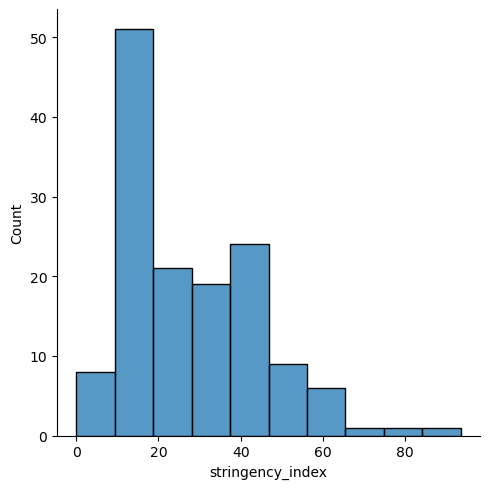

In [298]:
# Plot Stringency Index
sns.displot(df_SIDeathsNoV2, x="stringency_index")

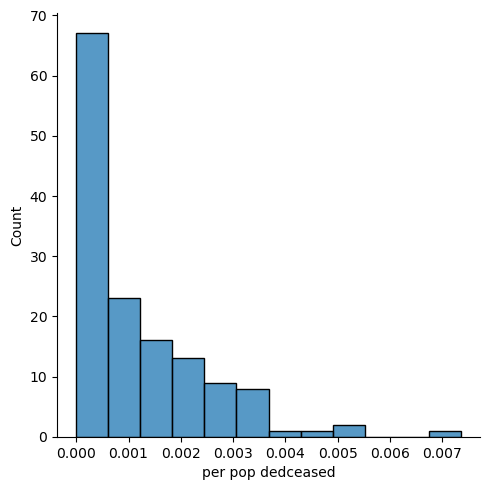

In [299]:
sns.displot(df_SIDeathsNoV2, x="per pop dedceased")

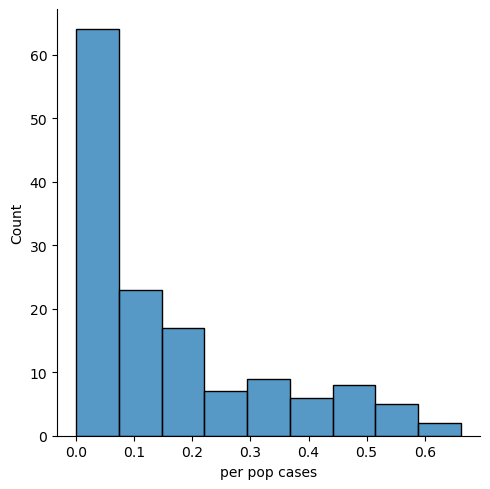

In [300]:
sns.displot(df_SICasesNoV2, x="per pop cases")

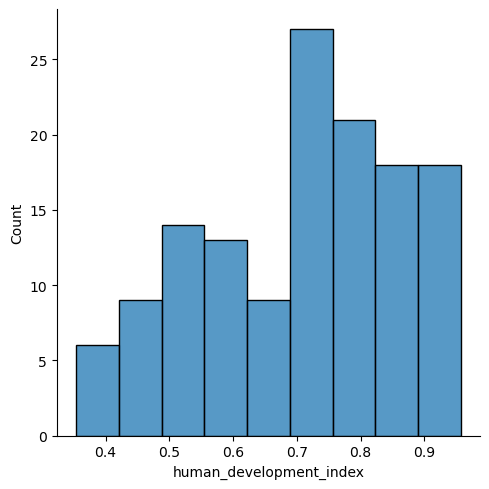

In [301]:
sns.displot(df_SIHDevIndxV2, x="human_development_index")

In [302]:
# Setup new Datasets for Regression tests.

df_SIDeathsDep = df_SIDeathsNoV2[["stringency_index"]]     # Dependent Variable
df_SIDeathsInd = df_SIDeathsNoV2[["per pop dedceased"]]    # Independent variable





In [303]:
df_SIDeathsInd

,per pop dedceased
0,0.000237
1,0.000200
2,0.001253
3,0.002889
4,0.002333
...,...
139,0.000046
140,0.000072
141,0.001722
142,0.000219


In [304]:
df_SIDeathsDep

,stringency_index
0,29.63
1,11.11
2,11.11
3,39.81
4,35.19
...,...
139,59.72
140,11.11
141,11.11
142,6.48


Create first model to perform a regression analysis - Stringency Index = f(# of Covid-19 cases)

In [305]:
# Store the values as X and y before the applying the ML model
# For machine learning model, the data has already been split into independent and dependent variables

X = df_SIDeathsInd          # Features independent variables - No of deathhs per capita 

y = df_SIDeathsDep           # Target variable - Stringency Index



In [306]:
## Normalise Data
# Scaling necessary to align the scales of the independent and dependent variables.
sca = StandardScaler()
X_scaled = sca.fit_transform(X)
y_scaled = sca.fit_transform(y)

In [307]:
# print Independent and dependent variables for a quick visual check
print("This is X-scaled ", X_scaled)

This is X-scaled  [[-7.19050140e-01]
 [-7.47300739e-01]
 [ 6.39172479e-02]
 [ 1.32489742e+00]
 [ 8.96076245e-01]
 [-4.64622327e-01]
 [ 7.44188673e-01]
 [ 2.88121072e+00]
 [ 5.94860128e-01]
 [-7.64256210e-01]
 [ 1.29189871e+00]
 [ 3.24484962e+00]
 [-2.14033801e-01]
 [-9.00563429e-01]
 [-8.91174014e-01]
 [-6.72534592e-01]
 [ 5.65283641e-01]
 [ 1.58197892e+00]
 [ 7.25011971e-01]
 [-8.80561863e-01]
 [ 9.16512258e-03]
 [-3.21021747e-01]
 [ 4.16401854e-01]
 [ 3.97331810e-03]
 [-8.89299742e-01]
 [-8.83505087e-01]
 [-8.47627542e-01]
 [ 3.20563628e-01]
 [-8.77520694e-01]
 [ 1.76560063e+00]
 [-8.45361074e-01]
 [ 1.24470225e+00]
 [-3.21166795e-01]
 [ 1.30510706e-01]
 [ 4.79069032e-01]
 [-7.54114645e-01]
 [ 2.58553547e-02]
 [-1.73611813e-01]
 [-5.90091628e-01]
 [-7.80642746e-01]
 [ 6.65872681e-01]
 [ 6.46365464e-01]
 [-7.14805127e-01]
 [ 9.58360666e-01]
 [-8.50777467e-01]
 [-8.33925414e-02]
 [-1.46744874e-01]
 [ 1.28418884e+00]
 [-8.65350627e-01]
 [-6.16472949e-01]
 [-7.82909045e-01]
 [-8.75187778

In [308]:
print("This is y-scaled ",y_scaled)

This is y-scaled  [[ 0.1394986 ]
 [-0.96222985]
 [-0.96222985]
 [ 0.74509232]
 [ 0.4702551 ]
 [-0.96222985]
 [-0.08060913]
 [-0.08060913]
 [ 1.18590268]
 [ 0.41493072]
 [-0.24598738]
 [-0.96222985]
 [-0.96222985]
 [-0.79685161]
 [-0.96222985]
 [-0.63147336]
 [-0.24598738]
 [ 0.74509232]
 [ 0.8004167 ]
 [-0.30131175]
 [-0.79685161]
 [-0.63147336]
 [ 0.91047057]
 [ 0.1394986 ]
 [-0.08060913]
 [-0.35604125]
 [-0.13593351]
 [-0.96222985]
 [-0.68679774]
 [ 1.87478041]
 [ 0.02944474]
 [-0.41136562]
 [-1.18233759]
 [-0.74212211]
 [-0.74212211]
 [ 1.29595655]
 [-0.96222985]
 [ 0.30487685]
 [-1.29239146]
 [ 1.18590268]
 [ 2.28763114]
 [-0.96222985]
 [ 0.63503846]
 [ 0.11213386]
 [ 0.96579495]
 [-0.19125789]
 [ 1.95746954]
 [-0.96222985]
 [ 1.4613348 ]
 [-0.96222985]
 [-0.79685161]
 [ 1.13117319]
 [-0.19125789]
 [ 1.15853794]
 [ 0.1394986 ]
 [ 0.41493072]
 [-0.74212211]
 [-1.62314795]
 [ 0.85574108]
 [-0.96222985]
 [-0.74212211]
 [ 0.24955247]
 [ 0.63503846]
 [-0.96222985]
 [-0.30131175]
 [-0.96

## Splitting Data into Training and Testing

In [309]:
# Import train_test_split function
from sklearn.model_selection import train_test_split  

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.20, random_state = 102) # 80% training and 20% test


In [310]:
# X_train, 

In [311]:
# X_test

In [312]:
# y_train

In [313]:
# y_test

In [314]:
# Display the rows and columns (dimenions) of an unsplit dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the split   dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (141, 1) (141, 1)
Number of rows and columns after splitting dataset:  (112, 1) (29, 1) (112, 1) (29, 1)


## #Regression Models 

In [315]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [316]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  -0.838710946981597
STD:  2.135397912395038




In [317]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

[0.03469104]
[[-0.11241859]]


In [318]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
# y_pred

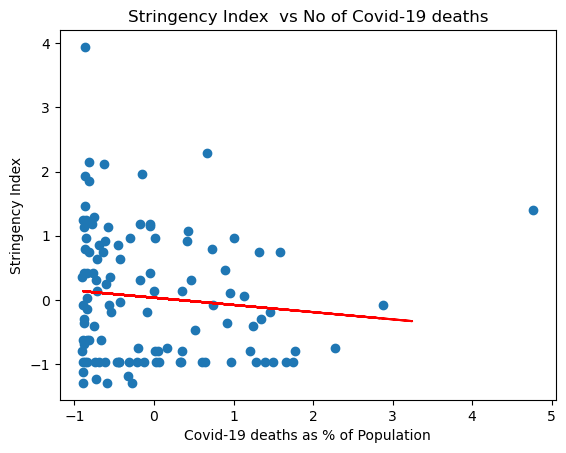

In [319]:
# Show the plotted values
plt.title('Stringency Index  vs No of Covid-19 deaths')
plt.ylabel('Stringency Index')
plt.xlabel('Covid-19 deaths as % of Population')
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [320]:
# print("Xtest ", X_test, "y_pred ", y_pred )

In [321]:
# Display the test and predicted values
y_test = y_test.tolist()
y_pred = y_pred.tolist()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,[-0.7968516060468226],[0.12270457260622727]
1,[1.8747804125301635],[-0.16379529839007384]
2,[1.1859026842932119],[-0.032182298841898126]
3,[0.6350384560139224],[0.08144350614140865]
4,[-0.13593350926681114],[0.11731886130256047]


In [322]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.8030279406019569
Mean Squared Error: 0.9596290656783514
Root Mean Squared Error: 0.9796065871962844
R2 score: 0.02249859536585741


## Linear Regression with No of cases of Covid-19 as the Independent variable

In [323]:
# set up the variables
df_SICasesDep = df_SICasesNoV2[["stringency_index"]]
df_SICasesInd = df_SICasesNoV2[["per pop cases"]]

In [324]:
df_SICasesDep.head()

,stringency_index
0,29.63
1,11.11
2,11.11
3,39.81
4,35.19


In [325]:
df_SICasesInd.head()

,per pop cases
0,0.103251
1,0.005052
2,0.115339
3,0.215800
4,0.564751


In [326]:
# Store the values as X and y before the applying the ML model
# For machine learning model, the data has already been split into independent and dependent variables

X1 = df_SICasesInd          ## Features independent variables - No of Covid-19 cases per capita 

y1 = df_SICasesDep          # Target variable - Stringency Index



In [327]:
## Scale Data 
sca = StandardScaler()
X1_scaled = sca.fit_transform(X1)
y1_scaled = sca.fit_transform(y1)

In [328]:
#X1_scaled

In [329]:
#y1_scaled

In [330]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X1_scaled, y1_scaled, test_size=0.3, random_state=0)

In [331]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((141, 1), (141, 1), (98, 1), (43, 1), (98, 1), (43, 1))

In [332]:
#X_train

In [333]:
#y_train

In [334]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [335]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  0.0019491106493078614
STD:  0.18736253388206298




In [336]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

[0.03813669]
[[-0.35058293]]


In [337]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
# y_pred

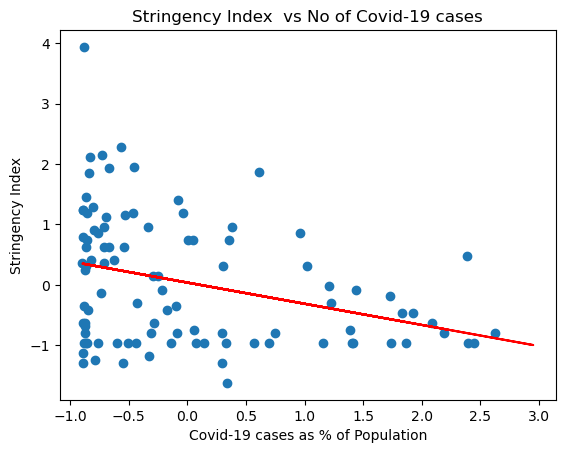

In [338]:
# Show the plotted values
plt.title('Stringency Index  vs No of Covid-19 cases')
plt.ylabel('Stringency Index')
plt.xlabel('Covid-19 cases as % of Population')

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [339]:
#y_test

In [340]:
#y_pred

In [341]:
# Display the test and predicted values
#print("y test ", y_test)
#print("y pred ", y_pred)
#print(type(y_test))
#print(type(y_pred))
y_test = y_test.tolist()
y_pred = y_pred.tolist()

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.head()

,Actual,Predicted
0,[-0.1912578864050119],[-0.11911310787422807]
1,[-0.7421221146843014],[-0.7412965640941871]
2,[-0.08060913212861036],[0.10568061865872794]
3,[1.1311731929306905],[0.34677391391773604]
4,[-0.7421221146843014],[0.0046839134217775275]


In [342]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.6422020368043075
Mean Squared Error: 0.7113726248705398
Root Mean Squared Error: 0.8434290870432083
R2 score: -0.0007907752011628855


## Linear Regression with Development Index as the Independent variable

In [343]:
# Split the dataset into X and y columns

df_SIHDevIndDep = df_SIHDevIndxV2[['stringency_index']]
df_SIHDevIndInd = df_SIHDevIndxV2[['human_development_index']]

In [344]:
df_SIHDevIndDep.info

<bound method DataFrame.info of      stringency_index
0               29.63
1               11.11
2               11.11
3               39.81
4               35.19
..                ...
139             59.72
140             11.11
141             11.11
142              6.48
143             42.59

[135 rows x 1 columns]>

In [345]:
df_SIHDevIndInd.info

<bound method DataFrame.info of      human_development_index
0                      0.863
1                      0.498
2                      0.764
3                      0.825
4                      0.908
..                       ...
139                    0.603
140                    0.452
141                    0.699
142                    0.588
143                    0.535

[135 rows x 1 columns]>

In [346]:
X2 = df_SIHDevIndDep         # Features (independent variables) from the Student Performance

y2 = df_SIHDevIndInd       # Target variable (Pass / Fail) for the prediction


In [347]:
## Normalise Data 
sca = StandardScaler()
X2_scaled = sca.fit_transform(X1)
y2_scaled = sca.fit_transform(y1)

In [348]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X2_scaled, y2_scaled, test_size=0.2, random_state=0)

In [349]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((141, 1), (141, 1), (112, 1), (29, 1), (112, 1), (29, 1))

In [350]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [351]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  -0.022330948246770156
STD:  0.2585264585015057




In [352]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

[0.05178973]
[[-0.3457762]]


In [353]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
# y_pred

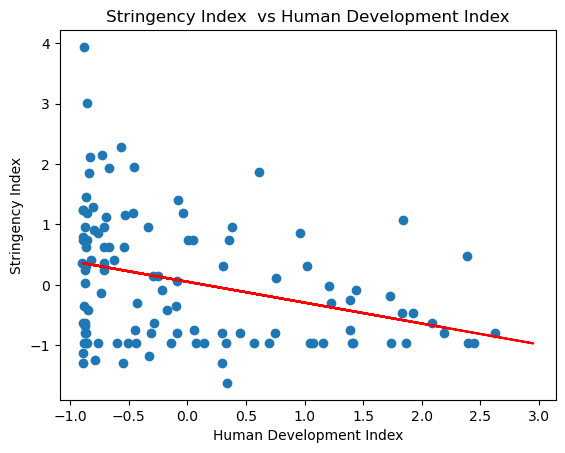

In [354]:
# Show the plotted values
plt.title('Stringency Index  vs Human Development Index')
plt.ylabel('Stringency Index')
plt.xlabel('Human Development Index')
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [355]:
# Display the test and predicted values
y_test = y_test.tolist()
y_pred = y_pred.tolist()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,[-0.1912578864050119],[-0.10330407086741439]
1,[-0.7421221146843014],[-0.7169569822029136]
2,[-0.08060913212861036],[0.11840758565104029]
3,[1.1311731929306905],[0.3561953330752597]
4,[-0.7421221146843014],[0.018795611747900474]


In [356]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.6016927783977466
Mean Squared Error: 0.5708952914009681
Root Mean Squared Error: 0.7555761321011722
R2 score: -0.15177109655411747
